<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-수집" data-toc-modified-id="데이터-수집-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 수집</a></span><ul class="toc-item"><li><span><a href="#find_all은-리스트형태이기-때문에-개별값에-대해-text-처리" data-toc-modified-id="find_all은-리스트형태이기-때문에-개별값에-대해-text-처리-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>find_all은 리스트형태이기 때문에 개별값에 대해 text 처리</a></span></li><li><span><a href="#불필요한-정보-replace로-제거" data-toc-modified-id="불필요한-정보-replace로-제거-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>불필요한 정보 replace로 제거</a></span></li><li><span><a href="#판다스를-이용,-데이터프레임-형식으로-추출" data-toc-modified-id="판다스를-이용,-데이터프레임-형식으로-추출-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>판다스를 이용, 데이터프레임 형식으로 추출</a></span></li></ul></li><li><span><a href="#크롤러-코드-총-정리" data-toc-modified-id="크롤러-코드-총-정리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>크롤러 코드 총 정리</a></span></li><li><span><a href="#간단한-전처리" data-toc-modified-id="간단한-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>간단한 전처리</a></span><ul class="toc-item"><li><span><a href="#외국어-리뷰나-리뷰-코멘트-부분이-공백인-경우의-행-삭제" data-toc-modified-id="외국어-리뷰나-리뷰-코멘트-부분이-공백인-경우의-행-삭제-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>외국어 리뷰나 리뷰 코멘트 부분이 공백인 경우의 행 삭제</a></span></li><li><span><a href="#빈칸삭제-2" data-toc-modified-id="빈칸삭제-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>빈칸삭제 2</a></span></li><li><span><a href="#불용어-제거" data-toc-modified-id="불용어-제거-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>불용어 제거</a></span><ul class="toc-item"><li><span><a href="#긍정" data-toc-modified-id="긍정-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>긍정</a></span></li><li><span><a href="#부정" data-toc-modified-id="부정-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>부정</a></span></li></ul></li></ul></li><li><span><a href="#단어-사용빈도-분석-TD-IDF" data-toc-modified-id="단어-사용빈도-분석-TD-IDF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>단어 사용빈도 분석 TD-IDF</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#긍정" data-toc-modified-id="긍정-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>긍정</a></span></li><li><span><a href="#부정" data-toc-modified-id="부정-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>부정</a></span></li><li><span><a href="#3점" data-toc-modified-id="3점-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>3점</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import urllib
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import sys
from tqdm import tqdm
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

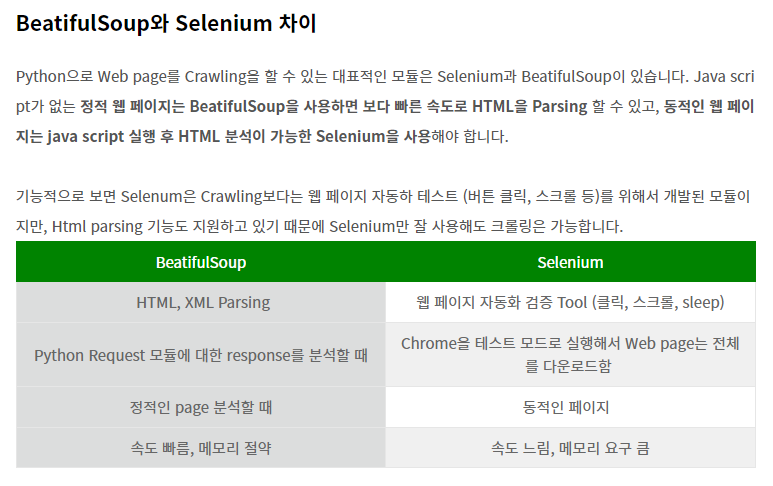

https://m.blog.naver.com/1012rnjsdydgns/222372764533

https://zhuyuan7.github.io/blog/making-cafe-web-03/

https://world-insight-seeker.tistory.com/203

https://seungjuitmemo.tistory.com/203

https://signing.tistory.com/46

https://kibua20.tistory.com/192

## 데이터 수집

In [2]:
driver = webdriver.Chrome()
driver.get("https://www.google.co.kr/maps/place/%EA%B5%90%EB%B3%B4%EB%AC%B8%EA%B3%A0+%EA%B4%91%ED%99%94%EB%AC%B8%EC%A0%90/data=!4m11!1m2!2m1!1z6rWQ67O066y46rOgIOq0ke2ZlOusuOygkA!3m7!1s0x357ca2eb7d883001:0x4c787fc765780c23!8m2!3d37.5709413!4d126.977787!9m1!1b1!15sChnqtZDrs7TrrLjqs6Ag6rSR7ZmU66y47KCQIgOIAQFaHSIb6rWQ67O0IOusuOqzoCDqtJHtmZTrrLgg7KCQkgEKYm9va19zdG9yZZoBI0NoWkRTVWhOTUc5blMwVkpRMEZuU1VSVGVqazNURVJCRUFF4AEA?hl=ko")
driver.implicitly_wait(3) 

boxes = driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')

for i in tqdm(range(7)): # 300번 정도 돌아가다가 무한로딩 걸림
    try:
        driver.execute_script("arguments[0].scrollBy(0, 300)", boxes)
        time.sleep(0.5)
    except:
        pass

html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser') # 페이지 파싱

<ipython-input-2-1789007d1fdc>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  boxes = driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')
100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.20it/s]


In [3]:
soup.find_all('span','wiI7pd') # soup에서 span tag의 class가 wil7pd인 태그

[<span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">서울 종로구 종로 1 교보생명빌딩 지하1층
 (광화문역 4번출구로 가서 계단 올라가면 좌측에 바로 교보문고로 연결된 문이 있음)…</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">오랫만에 들른 교보문고. 예전과 좀 달라졌지만 더 좋아진 것 같네요. 책뿐만 아니라 문구류도 전보다 더 다양하게 구비된 것 같아서 볼게 많아서 좋더라구요.
 다만 밖으로 나오니 시위대 집회하는것 때문에 살짝 짜증이..ㅋ</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">광화문역4번 출구에 이어져 시간이 남을때, 또는 시간을 내어 방문하기 좋습니다. 친절하고 잘 정리되어 있고 다양한 체험을 할수있는 서점이라 다녀오면 뿌듯합니다.</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">항상 많은 책이 있어 좋아요!
 넓어서 책찾으려면 오래걸리지만 그만큼 책종류가 많다는거니 좋아요!
 한번들어가면 절대 금방못나와요ㅋㅋㅋ</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">광화문에 있는 교보문고는 여름에는 시원함을 겨울에는 따뜻함을 주고 세상 모든분야의 책들이 있는 대한민국 최고의 지식과 지혜의 놀이터에요~하루종일 책을 읽으라고해도 나는 좋을듯~^^</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">교보문고 앞마당있는벚꽃나무가 너무이쁘게폈어요 그옆부러 청진공원이있어 카메라사진에담았어요</span>,
 <span class="wiI7pd" jsan="7.wiI7pd" jstcache="171">주말이나 평일 저녁에 한번씩 꼭 방문하는 장소. 교보문고만의 향이 늘 반겨주고 읽을 책들이 한가득 있어서 늘 만족하는 곳 입

### find_all은 리스트형태이기 때문에 개별값에 대해 text 처리

In [4]:
contents_lst = []
contents = soup.find_all('span','wiI7pd')

for i in contents:
    tmp = i.text.strip()
    contents_lst.append(tmp)
    print(i.text.strip())
    print('\n')

서울 종로구 종로 1 교보생명빌딩 지하1층
(광화문역 4번출구로 가서 계단 올라가면 좌측에 바로 교보문고로 연결된 문이 있음)…


오랫만에 들른 교보문고. 예전과 좀 달라졌지만 더 좋아진 것 같네요. 책뿐만 아니라 문구류도 전보다 더 다양하게 구비된 것 같아서 볼게 많아서 좋더라구요.
다만 밖으로 나오니 시위대 집회하는것 때문에 살짝 짜증이..ㅋ


광화문역4번 출구에 이어져 시간이 남을때, 또는 시간을 내어 방문하기 좋습니다. 친절하고 잘 정리되어 있고 다양한 체험을 할수있는 서점이라 다녀오면 뿌듯합니다.


항상 많은 책이 있어 좋아요!
넓어서 책찾으려면 오래걸리지만 그만큼 책종류가 많다는거니 좋아요!
한번들어가면 절대 금방못나와요ㅋㅋㅋ


광화문에 있는 교보문고는 여름에는 시원함을 겨울에는 따뜻함을 주고 세상 모든분야의 책들이 있는 대한민국 최고의 지식과 지혜의 놀이터에요~하루종일 책을 읽으라고해도 나는 좋을듯~^^


교보문고 앞마당있는벚꽃나무가 너무이쁘게폈어요 그옆부러 청진공원이있어 카메라사진에담았어요


주말이나 평일 저녁에 한번씩 꼭 방문하는 장소. 교보문고만의 향이 늘 반겨주고 읽을 책들이 한가득 있어서 늘 만족하는 곳 입니다. 언제나 사람이 많지만 그래도 좋습니다. 코로나 이후 한가지 아쉬운점은 앉아서 책을 볼 수 있는 공간이 없어져 꼼꼼하게 책을 보기가 조금 어렵습니다. 그래도 이렇게 많은 새로운 책들을 한번에 볼 수 있고 찾고자 하는 대부분의 책들이 모두 있어서 너무 좋습니다. 책을 좋아한다면 꼭 한번은 방문해볼 장소입니다.


모든책이 다있는곳.
인문,어학 등등
음반및 각종 생활용품까지 덤으로 쇼핑할수있는곳.…




### 불필요한 정보 replace로 제거

In [5]:
rating_lst = []
rating = soup.find_all('span','kvMYJc')

for i in rating:
    tmp = i['aria-label'].replace('별표 ','').replace('개','')
    rating_lst.append(tmp)
    print(tmp) # 불필요한 정보 replace로 제거

 5 
 4 
 4 
 5 
 5 
 5 
 5 
 4 


In [6]:
time_lst = []
time = soup.find_all('span','rsqaWe')

for i in time:
    tmp = i.text.strip()
    time_lst.append(tmp)
    print(i.text.strip())

3주 전
3달 전
2달 전
8달 전
2주 전
4달 전
2달 전
8달 전


### 판다스를 이용, 데이터프레임 형식으로 추출

In [7]:
df = pd.DataFrame(None)
df['contents'] = contents_lst
df['rating'] = rating_lst
df

,contents,rating
0,서울 종로구 종로 1 교보생명빌딩 지하1층\n(광화문역 4번출구로 가서 계단 올라가...,5
1,오랫만에 들른 교보문고. 예전과 좀 달라졌지만 더 좋아진 것 같네요. 책뿐만 아니라...,4
2,"광화문역4번 출구에 이어져 시간이 남을때, 또는 시간을 내어 방문하기 좋습니다. 친...",4
3,항상 많은 책이 있어 좋아요!\n넓어서 책찾으려면 오래걸리지만 그만큼 책종류가 많다...,5
4,광화문에 있는 교보문고는 여름에는 시원함을 겨울에는 따뜻함을 주고 세상 모든분야의 ...,5
5,교보문고 앞마당있는벚꽃나무가 너무이쁘게폈어요 그옆부러 청진공원이있어 카메라사진에담았어요,5
6,주말이나 평일 저녁에 한번씩 꼭 방문하는 장소. 교보문고만의 향이 늘 반겨주고 읽을...,5
7,"모든책이 다있는곳.\n인문,어학 등등\n음반및 각종 생활용품까지 덤으로 쇼핑할수있는곳.…",4


## 크롤러 코드 총 정리

리뷰 더보기 버튼을 누름 + 페이지 아래 스크롤 을 통해 1946 개의 리뷰 모두를 불러옴

https://hello-bryan.tistory.com/194

https://jcstory94.tistory.com/69

In [28]:
driver = webdriver.Chrome()
driver.get("https://www.google.co.kr/maps/place/%EA%B5%90%EB%B3%B4%EB%AC%B8%EA%B3%A0+%EA%B0%95%EB%82%A8%EC%A0%90/data=!4m7!3m6!1s0x357ca3e201084d43:0x9d38cf082075b599!8m2!3d37.5037059!4d127.0241346!9m1!1b1?hl=ko")
driver.implicitly_wait(3) 

# div 태그 안에 스크롤이 있는 경우
boxes = driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')
#driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[7]/div[2]/button').click()
#driver.find_element_by_xpath('//*[@id="action-menu"]/ul/li[2]').click()
#최신순으로 정렬하면 내용이 없는 경우가 많음

for i in tqdm(range(30000)): 
    try:
        driver.execute_script("arguments[0].scrollBy(0, 1200)", boxes)
        time.sleep(0.5)
    except:
        pass

html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser') # 페이지 파싱

contents_lst = []
contents = soup.find_all('span','wiI7pd')

for i in contents: # if문 elif 구분
    tmp = i.text.strip()
    contents_lst.append(tmp)
    print(i.text.strip())
    print('\n')
    
rating_lst = []
rating = soup.find_all('span','kvMYJc')

for i in rating:
    tmp = i['aria-label'].replace('별표 ','').replace('개','')
    rating_lst.append(tmp)
    print(tmp) # 불필요한 정보 replace로 제거
    
time_lst = []
time = soup.find_all('span','rsqaWe')

for i in time:
    tmp = i.text.strip()
    time_lst.append(tmp)
    print(i.text.strip())
    
df = pd.DataFrame(None)
df['contents'] = contents_lst
df['rating'] = rating_lst
df['time'] = time_lst
df

<ipython-input-28-7a90648d290f>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  boxes = driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')
<ipython-input-28-7a90648d290f>:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[7]/div[2]/button').click()
<ipython-input-28-7a90648d290f>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="action-menu"]/ul/li[2]').click()
100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:28<00:00, 337.23it/s]





책 종류도 많고, 마음껏 책을 볼 수 있어 좋은 곳


교통편 좋고 적당한 서적과 문구.팬시류를 동시에 접할수 있음


좋음








우리 가족의 최고의 놀이터


대형 서점














각종 책과 문구류, 헤드폰 등 전자제품을 편하게 쇼핑할 수 있는 공간. 잠깐 앉아서 쉴 곳이 아쉽네요.





책을 고르는 기분은 마치 새로운 세계를 탐험하는 기분이다.
오늘도 설레이는 마음으로 go~ go~





강남 일대에서 제일 큰 오프라인 서점. 코엑스 몰과 고속터미널에 있는 서점 대비 가장 나음. 점점 츠타야를 닮아가는 것이 서점의 트렌드라 그런지 디지털, 문구류(hot tracks), 소품 면적이 늘고 음반 매장이 작아지는 추세. 디지털 제품과 인테리어 소품도 간단한 것을 구할 수 있음.…














(Google 번역 제공) 나쁘지 않아

(원문)
Not too bad


책 종류도 많고 시원하고 깨끗해서 좋아요!!














다양한서적조아요








소소











매장넓고 볼거리가많아 좋아요


없는책이 없어요. 굿입니다


가끔씩 들러서  한바퀴 돌아보는 장소











(Google 번역 제공) 매우 친절하고 친절합니다

(원문)
Very nice and friendly








책들이 많아서 책들을 고르는 재미가 있었고 또한 시설도 굉장히 잘 꾸며져 있었어요.


일단 책이 많아서 만족합니다. 책보기도 굿~^^





지하로 가는ㅊ엘리베이터 있어요














자주 가는 서점!!





넓고 깨끗하고 시윤하고...
ㅈㅅ은 ㅈㅅ 입니다~





깔끔하고쾌적


책많고 시원하고.

앉을 자리가 10자리정도밖에 없어요.


아이들과 오랜만에 서점 데이트했어요. 너무 오랜만이지만 재밌게 둘러봤어요.
너무 늦게 가서 다 보지 못한게 아쉽네요.
아.  요즘 책은 정가 판매 한다고 해서 온라인 구매하려고 몇가지 빼고 요책들은 사볼까 하고 메모대신 찍어봤어요.





 5 
 4 
 4 
 5 
 4 
 4 
 5 
 3 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 4 
 5 
 4 
 3 
 5 
 3 
 4 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 3 
 5 
 5 
 4 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 4 
 4 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 3 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 4 
 3 
 3 
 5 
 4 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 4 
 4 
 4 
 5 
 5 
 4 
 5 
 4 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 4 
 5 
 5 
 5 
 4 
 5 
 4 
 5 
 5 
 1 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 3 
 5 
 5 
 5 
 5 
 4 
 5 
 4 
 5 
 5 
 5 
 4 
 4 
 5 
 5 
 5 
 4 
 5 
 5 
 4 
 5 
 5 
 4 
 4 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 3 
 5 
 5 
 4 
 5 
 4 
 5 
 4 
 4 
 5 
 4 
 5 
 5 
 4 
 5 
 5 
 4 
 5 
 5 
 4 
 4 
 5 
 3 
 5 
 3 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 4 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 5 
 5 
 4 
 5 
 5 
 5 
 5 
 3 
 5 
 4 
 4 
 5 
 5 
 5 
 4 


,contents,rating,time
0,,5,18시간 전
1,"책 종류도 많고, 마음껏 책을 볼 수 있어 좋은 곳",4,3일 전
2,교통편 좋고 적당한 서적과 문구.팬시류를 동시에 접할수 있음,4,4일 전
3,좋음,5,4일 전
4,,4,4일 전
5,,4,4일 전
6,우리 가족의 최고의 놀이터,5,4일 전
7,대형 서점,3,5일 전
8,,5,5일 전
9,,5,5일 전


In [26]:
df

,contents,rating,time
0,아이들과 오랜만에 서점 데이트했어요. 너무 오랜만이지만 재밌게 둘러봤어요.\n너무 ...,4,4주 전
1,"지하철역과 이어짐. 책외에도 다양한 볼거리들 많음. 아트박스, 핫트랙스,카카오프렌즈...",5,1달 전
2,"각종 책과 문구류, 헤드폰 등 전자제품을 편하게 쇼핑할 수 있는 공간. 잠깐 앉아서...",4,1주 전
3,한국을 이끄는 책방이며 언제 방문해도 좋은데 🤔 아쉽게도 제가 찾던 디자이너 책이 ...,4,2달 전
4,주차비가 10분당 천원으로 사악해요~ 교보문고에 회원이 아니면 3만원 이상 구입하면...,4,2년 전
5,지하철 9호선 신논현역과 바로 연결되는 입지와 주차시설이 매우 좋은 대형서점입니다....,5,1년 전
6,"직원분들이 너무나 친절히 책을 찾아 주셨어요.\n문제지를 골라 사려했는데, 여러 회...",5,1달 전
7,언제 가도 깨끗하고 친절하네요\n주차장 진출입로 좁다길래 걱정했는데 딱히...?\n...,5,1달 전
8,책을 고르는 기분은 마치 새로운 세계를 탐험하는 기분이다.\n오늘도 설레이는 마음으...,5,1주 전
9,문구코너와 선물코너에 다양한 많은 상품들이 있어\n선택의 폭이 넓고 책들 또한 많이...,4,3년 전


In [27]:
df.to_csv('교보문고(강남점) 관련도순 후기.csv')

## 간단한 전처리

### 외국어 리뷰나 리뷰 코멘트 부분이 공백인 경우의 행 삭제

In [8]:
pd.set_option('display.max_columns', None)

In [10]:
df = df.iloc[:707,:]

In [13]:
df

,contents,rating
0,지하에 위치해 있는 서점입니다. 백화점에 있는게 아니라 근처 건물에 있길래 작을지 ...,5
1,교보문고 책 많고 핫트랙스 있어서 문구 사기 좋아요. 주차장 엄청 좁고 불편합니다....,3
2,창원에 교보문고가 있어서 전 정말 다행입니다ㅎ 초등입학한 딸하고 학교다녀와서 준비물...,4
3,"많은 책, 문구류, 앨범까지. 만족. 사람은 많음.",5
4,오전 11시 ~ 오후9시30분 까지 영업합니다. 설&추석 당일은 휴무이구요. 연말이...,4
5,인터넷 서점은 직접골라야하는데\n창원점 교보는 다양하게 편하게 고를수 있어서 좋아요...,5
6,직원수가 부적한 지 썩 친절하지 않네요. 온라인에서는 아무런 메시지도 없이 취소처리...,1
7,검색도 쉽고 바로받기하면 인터넷과 마찬가지로 10프로 저렴하게 구매가 가능해요.,5
8,큰 서점과 문구류를 함께 구매해서 좋구요.\n책 찾기도 쉬워요\n단 어떤 멍청한 인...,3
9,주말에 책나들이 하기 좋은곳 지하주차장 들어가려면 초보분들은 조금 각오해야할지도?,4


In [12]:
df.to_csv('교보문고 후기.csv')

In [92]:
df = pd.read_csv('교보문고 후기.csv', index_col=0)

### 빈칸삭제 2

https://aplab.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-seaborn-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0-%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84%EC%BA%A3%ED%94%8C%EB%9E%8F%ED%9E%88%ED%8A%B8%EB%A7%B5%ED%8E%98%EC%96%B4%ED%94%8C%EB%9E%8F-%EB%93%B1

In [94]:
df['rating'].value_counts()

5    361
4    209
3     92
2     25
1     20
Name: rating, dtype: int64

<AxesSubplot:>

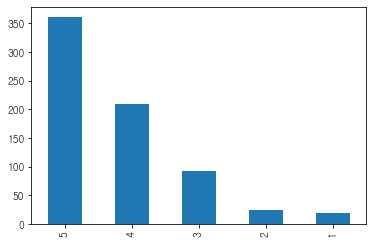

In [95]:
CountStatus = pd.value_counts(df['rating'].values, sort=True) # 바로 판다스로
#df["rating"].value_counts().plot(kind="bar") # 맷플랏립
CountStatus.plot.bar()

In [119]:
# 한글 외 문자 제거(옵션)
import re # 정규식을 사용하기 위해 re 모듈을 임포트
# ‘ㄱ ~‘힣’까지의 문자를 제외한 나머지는 공백으로 치환, 영문: a-z| A-Z
df2 = df.copy()

df2['contents'] = df2['contents'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
print(df2.head())

                                            contents  rating
0  지하에 위치해 있는 서점입니다  백화점에 있는게 아니라 근처 건물에 있길래 작을지 ...       5
1  교보문고 책 많고 핫트랙스 있어서 문구 사기 좋아요  주차장 엄청 좁고 불편합니다 ...       3
2  창원에 교보문고가 있어서 전 정말 다행입니다ㅎ 초등입학한 딸하고 학교다녀와서 준비물...       4
3                       많은 책  문구류  앨범까지  만족  사람은 많음        5
4  오전  시   오후 시 분 까지 영업합니다  설 추석 당일은 휴무이구요  연말이라 ...       4


In [120]:
# 특수문자 삭제하면서 생긴 빈칸 삭제
#df2['contents'].replace('',np.nan,inplace=True)
#df2
df2 = df2.drop([642,631,587], axis=0)
df2.head(3)

,contents,rating
0,지하에 위치해 있는 서점입니다 백화점에 있는게 아니라 근처 건물에 있길래 작을지 ...,5
1,교보문고 책 많고 핫트랙스 있어서 문구 사기 좋아요 주차장 엄청 좁고 불편합니다 ...,3
2,창원에 교보문고가 있어서 전 정말 다행입니다ㅎ 초등입학한 딸하고 학교다녀와서 준비물...,4


In [77]:
# df2.to_csv('교보문고 후기_전처리.csv')
df2 = pd.read_csv('교보문고 후기_전처리.csv', index_col=0)
df2

,contents,rating
0,지하에 위치해 있는 서점입니다 백화점에 있는게 아니라 근처 건물에 있길래 작을지 ...,5
1,교보문고 책 많고 핫트랙스 있어서 문구 사기 좋아요 주차장 엄청 좁고 불편합니다 ...,3
2,창원에 교보문고가 있어서 전 정말 다행입니다ㅎ 초등입학한 딸하고 학교다녀와서 준비물...,4
3,많은 책 문구류 앨범까지 만족 사람은 많음,5
4,오전 시 오후 시 분 까지 영업합니다 설 추석 당일은 휴무이구요 연말이라 ...,4
5,인터넷 서점은 직접골라야하는데 창원점 교보는 다양하게 편하게 고를수 있어서 좋아요 ...,5
6,직원수가 부적한 지 썩 친절하지 않네요 온라인에서는 아무런 메시지도 없이 취소처리...,1
7,검색도 쉽고 바로받기하면 인터넷과 마찬가지로 프로 저렴하게 구매가 가능해요,5
8,큰 서점과 문구류를 함께 구매해서 좋구요 책 찾기도 쉬워요 단 어떤 멍청한 인간이 ...,3
9,주말에 책나들이 하기 좋은곳 지하주차장 들어가려면 초보분들은 조금 각오해야할지도,4


In [78]:
df2['rating'].value_counts()

5    359
4    209
3     92
2     25
1     19
Name: rating, dtype: int64

<AxesSubplot:>

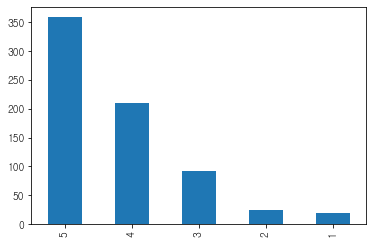

In [79]:
CountStatus = pd.value_counts(df2['rating'].values, sort=True) # 바로 판다스로
#df["rating"].value_counts().plot(kind="bar") # 맷플랏립
CountStatus.plot.bar()

### 불용어 제거

In [ ]:
## 5,4점/ 2,1점 따로

In [ ]:
## 3점에는 긍부가 섞여 있는 경우거나 부정적인 댓글인 경우가 많았음

In [80]:
df_p = df2[df2['rating'].isin([5,4])]
df_p = df_p.reset_index(drop=True)
df_p.head(3)

,contents,rating
0,지하에 위치해 있는 서점입니다 백화점에 있는게 아니라 근처 건물에 있길래 작을지 ...,5
1,창원에 교보문고가 있어서 전 정말 다행입니다ㅎ 초등입학한 딸하고 학교다녀와서 준비물...,4
2,많은 책 문구류 앨범까지 만족 사람은 많음,5


In [81]:
df_n = df2[df2['rating'].isin([2,1])]
df_n = df_n.reset_index(drop=True)
df_n.head(3)

,contents,rating
0,직원수가 부적한 지 썩 친절하지 않네요 온라인에서는 아무런 메시지도 없이 취소처리...,1
1,음 나는부동산과맞벌이한다 절판되서 구매못함,2
2,전문서적 고루 갖추지 못해 아쉽다,2


In [82]:
words1 = " ".join(df_p['contents'].tolist()) # " ".join(df[].tolist())
words1 = okt.morphs(words1,stem=True)

words2 = " ".join(df_n['contents'].tolist()) # " ".join(df[].tolist())
words2 = okt.morphs(words2,stem=True)
print(len(words1),len(words2))

5337 414


#### 긍정

In [86]:
remove_one_word1 = [x for x in words1 if len(x)>1]
with open('./stopwords2.txt', 'r') as f:
    list_file = f.readlines()
stopwords1 = list_file[0].split(",")
remove_stopwords1 = [x for x in remove_one_word1 if x not in stopwords1]
print(len(remove_stopwords1))
print(len(remove_one_word1))

2829
3696


#### 부정

In [98]:
remove_one_word2 = [x for x in words2 if len(x)>1]
with open('./stopwords2.txt', 'r') as f:
    list_file = f.readlines()
stopwords2 = list_file[0].split(",")
remove_stopwords2 = [x for x in remove_one_word2 if x not in stopwords2]
print(len(remove_stopwords2))
print(len(remove_one_word2))

224
291


## 단어 사용빈도 분석 TD-IDF

https://haystar.tistory.com/11

In [88]:
from konlpy.tag import Okt
# pip install jpype1==0.7.0 오류해결
# https://github.com/konlpy/konlpy/issues/291

In [89]:
okt = Okt()

In [90]:
from collections import Counter
frequent = Counter(remove_stopwords1).most_common()

In [91]:
frequent

[('좋다', 241),
 ('많다', 111),
 ('서점', 84),
 ('창원', 57),
 ('읽다', 54),
 ('주차장', 53),
 ('교보', 42),
 ('다양하다', 41),
 ('공간', 41),
 ('넓다', 40),
 ('주차', 39),
 ('문고', 35),
 ('크다', 34),
 ('친절하다', 28),
 ('지하', 25),
 ('아이', 24),
 ('좁다', 24),
 ('보다', 22),
 ('편하다', 22),
 ('깨끗하다', 20),
 ('직원', 19),
 ('사람', 18),
 ('구입', 17),
 ('조금', 17),
 ('종류', 16),
 ('아쉽다', 16),
 ('자다', 15),
 ('불편하다', 15),
 ('앉다', 15),
 ('서적', 15),
 ('위치', 14),
 ('생각', 14),
 ('대형', 14),
 ('도서', 14),
 ('핫트랙스', 14),
 ('찾다', 13),
 ('시간', 13),
 ('구매', 13),
 ('가장', 13),
 ('시설', 13),
 ('구류', 12),
 ('이용', 12),
 ('함께', 11),
 ('깔끔하다', 11),
 ('조용하다', 11),
 ('문구', 10),
 ('같이', 10),
 ('정리', 10),
 ('마음', 10),
 ('편리하다', 10),
 ('좋아하다', 10),
 ('쾌적하다', 10),
 ('쉬다', 9),
 ('빼다', 9),
 ('구경', 9),
 ('장소', 9),
 ('넘다', 8),
 ('보고', 8),
 ('괜찮다', 8),
 ('원하다', 8),
 ('인터넷', 7),
 ('분위기', 7),
 ('ㅎㅎ', 7),
 ('최고', 7),
 ('찾기', 7),
 ('건물', 6),
 ('고르다', 6),
 ('가보다', 6),
 ('정도', 6),
 ('오프라인', 6),
 ('서비스', 6),
 ('다른', 6),
 ('어렵다', 6),
 ('힘들다', 6),
 ('자주', 6),
 ('마련', 6),


In [92]:
positive100 = pd.DataFrame({'result':frequent})
positive100.dtypes

result    object
dtype: object

#### 긍정

In [93]:
pd.set_option('display.max_rows', None)

In [94]:
positive100 = pd.DataFrame({'result':frequent})
positive100['word'] = positive100.result.astype(str).str.split(',').str[0] #.astype(str) 추가
positive100['word'] = positive100['word'].str.replace("(",'')
positive100['word'] = positive100['word'].str.replace("'",'')
positive100['counts'] = positive100.result.astype(str).str.split(',').str[1]
positive100['counts'] = positive100['counts'].str.replace(")",'')
positive100 = positive100.iloc[:100,:]
positive100 = positive100.drop('result',axis=1)
positive100

<ipython-input-94-549b27104a47>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  positive100['word'] = positive100['word'].str.replace("(",'')
<ipython-input-94-549b27104a47>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  positive100['counts'] = positive100['counts'].str.replace(")",'')


,word,counts
0,좋다,241
1,많다,111
2,서점,84
3,창원,57
4,읽다,54
5,주차장,53
6,교보,42
7,다양하다,41
8,공간,41
9,넓다,40


#### 부정

In [101]:
frequent2 = Counter(remove_stopwords2).most_common()

negative100 = pd.DataFrame({'result':frequent2})
negative100['word'] = negative100.result.astype(str).str.split(',').str[0] #.astype(str) 추가
negative100['word'] = negative100['word'].str.replace("(",'')
negative100['word'] = negative100['word'].str.replace("'",'')
negative100['counts'] = negative100.result.astype(str).str.split(',').str[1]
negative100['counts'] = negative100['counts'].str.replace(")",'')
negative100 = negative100.iloc[:20,:]
negative100 = negative100.drop('result',axis=1)
negative100

<ipython-input-101-e3b6be057ce1>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  negative100['word'] = negative100['word'].str.replace("(",'')
<ipython-input-101-e3b6be057ce1>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  negative100['counts'] = negative100['counts'].str.replace(")",'')


,word,counts
0,주차장,14
1,최악,6
2,주차,6
3,좁다,6
4,지하,5
5,직원,4
6,입구,4
7,가지,4
8,많다,4
9,불친절하다,4


#### 3점

In [104]:
df_ne = df2[df2['rating'].isin([3])]
df_ne = df_ne.reset_index(drop=True)
df_ne.head(3)

words3 = " ".join(df_ne['contents'].tolist()) # " ".join(df[].tolist())
words3 = okt.morphs(words3,stem=True)

remove_one_word3 = [x for x in words3 if len(x)>1]
with open('./stopwords2.txt', 'r') as f:
    list_file = f.readlines()
stopwords3 = list_file[0].split(",")
remove_stopwords3 = [x for x in remove_one_word3 if x not in stopwords3]
print(len(remove_stopwords3))
print(len(remove_one_word3))

frequent3 = Counter(remove_stopwords3).most_common()

neutral = pd.DataFrame({'result':frequent3})
neutral['word'] = neutral.result.astype(str).str.split(',').str[0] #.astype(str) 추가
neutral['word'] = neutral['word'].str.replace("(",'')
neutral['word'] = neutral['word'].str.replace("'",'')
neutral['counts'] = neutral.result.astype(str).str.split(',').str[1]
neutral['counts'] = neutral['counts'].str.replace(")",'')
neutral = neutral.iloc[:100,:]
neutral = neutral.drop('result',axis=1)
neutral

518
669


<ipython-input-104-2a03e4b81e2a>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  neutral['word'] = neutral['word'].str.replace("(",'')
<ipython-input-104-2a03e4b81e2a>:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  neutral['counts'] = neutral['counts'].str.replace(")",'')


,word,counts
0,주차,29
1,주차장,25
2,좋다,23
3,서점,14
4,좁다,11
5,크다,11
6,불편하다,10
7,많다,8
8,교보,7
9,다양하다,7


In [105]:
positive100.to_csv('긍정.csv')
negative100.to_csv('부정.csv')
neutral.to_csv('중립.csv')